In [3]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data as  pdr
from numpy import linalg as la


In [4]:
# 1 Novo modo de pegar os dados das acoes

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
lista_acoes = ['VALE3.SA', 'MGLU3.SA', 'PETR4.SA', 'WEGE3.SA']
from datetime import datetime
startdate = datetime(2022,12,1)
enddate = datetime(2023,12,15)
precos = pdr.get_data_yahoo(lista_acoes, start=startdate, end=enddate)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [5]:
# 2 Pegando a Covariancia

retornos = precos.pct_change().dropna()
media_retornos = retornos.mean()
matriz_covariancia = retornos.cov()
pesos_carteira = np.array([2.5, 2.5, 2.5, 2.5])
numero_acoes = len(lista_acoes)


In [6]:
# 3 Premissas de Monte Carlos

numero_simulacoes = 100000
dias_projetados = 252*3
capital_inicial = 40000

In [7]:
# 4 Gerando Retorno Medio

retorno_medio = retornos.mean(axis= 0).to_numpy()
matriz_retorno_medio = retorno_medio*np.ones(shape = (dias_projetados, numero_acoes))

In [8]:
# 5 Gerando L

L = la.cholesky(matriz_covariancia)

In [9]:
# 6 Gerando Simulações

retornos_carteira = np.zeros([dias_projetados, numero_simulacoes]) # cada coluna é uma simulação
montante_final = np.zeros(numero_simulacoes)

for s in range(numero_simulacoes):
    Rpdf = np.random.normal(size=(dias_projetados, numero_acoes))
    retornos_sinteticos = matriz_retorno_medio + np.inner(Rpdf, L) # unica coisa ramdon é o Rpdf
    retornos_carteira[:, s] = np.cumprod(np.inner(pesos_carteira, retornos_sinteticos) + 1)*capital_inicial
    montante_final[s] = retornos_carteira[-1, s]

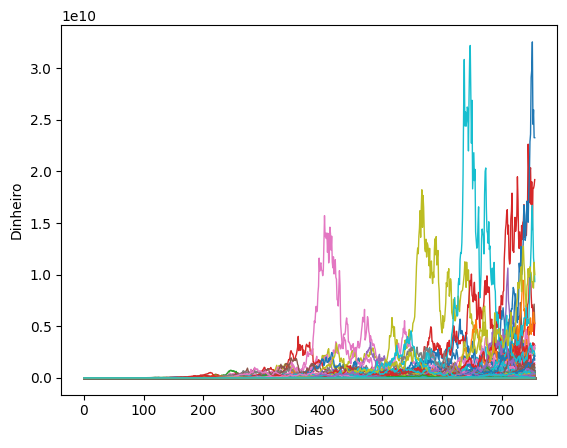

In [10]:
# 7 Gerando o Grafico

plt.plot(retornos_carteira, linewidth=1)
plt.ylabel('Dinheiro')
plt.xlabel('Dias')
plt.show()

In [11]:
# Gerando Estatistica de Confiança

montante_99 = str(np.percentile(montante_final, 1))
montante_95 = str(np.percentile(montante_final, 5))
montante_mediano = str(np.percentile(montante_final, 50))
cenarios_com_lucro = str((len(montante_final[montante_final > capital_inicial])/len(montante_final))*100) + "%"

In [12]:
# Resultado Estatistico

print(f'''Ao investir R$ 40.000,00 na carteira {lista_acoes}, podemos
esperar esses resultados para os proximos 3 anos, utilizando o metodo
de Monte Carlos com 100 mil simulações:

Com 50% de probabilidade, o montante será maior que R$ {montante_mediano}.

Com 95% de probabilidade, o montante será maior que R$ {montante_95}.

Com 99% de probabilidade, o montante será maior que R$ {montante_99}.

Em {cenarios_com_lucro} dos cenarios, foi possivel obter lucro nos proximos 3 anos.''')

Ao investir R$ 40.000,00 na carteira ['VALE3.SA', 'MGLU3.SA', 'PETR4.SA', 'WEGE3.SA'], podemos 
esperar esses resultados para os proximos 3 anos, utilizando o metodo
de Monte Carlos com 100 mil simulações:

Com 50% de probabilidade, o montante será maior que R$ 137.23123077571245.

Com 95% de probabilidade, o montante será maior que R$ 0.0657574457257495.

Com 99% de probabilidade, o montante será maior que R$ 0.0027348922788058183.

Em 10.844% dos cenarios, foi possivel obter lucro nos proximos 3 anos.


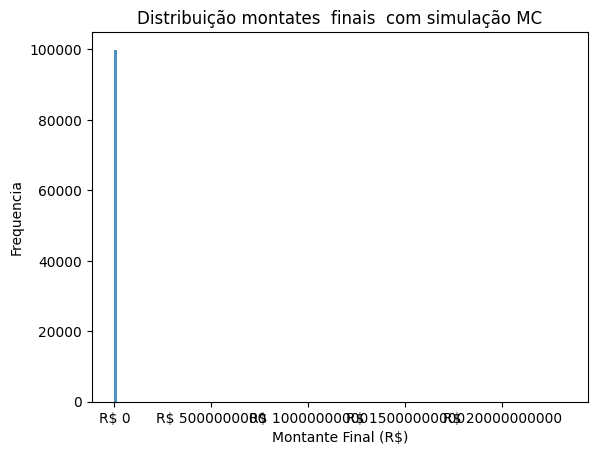

In [13]:
# Distribuição dos montantes

config = dict(histtype = 'stepfilled', alpha = 0.8, density = False, bins = 150)
fig, ax = plt.subplots()
ax.hist(montante_final, **config)
ax.xaxis.set_major_formatter('R$ {x:.0f}')
plt.title('Distribuição montates  finais  com simulação MC')
plt.xlabel('Montante Final (R$)')
plt.ylabel('Frequencia')
plt.show()